<a href="https://colab.research.google.com/github/JefNtungila/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Jef_Ntungila_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import matplotlib.pyplot as plt

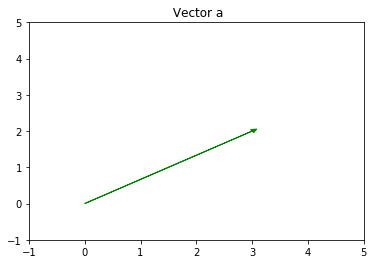

In [8]:
a = [3, 2]

plt.xlim(-1,5)          
plt.ylim(-1,5)


plt.arrow(0, 0, 3, 2, head_width=.1, head_length=.1, color = 'g')
plt.title(' Vector a')

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
import numpy as np

In [12]:
norm_b = np.linalg.norm([17,-4,-2,-1])
norm_b

17.60681686165901

The norm of a vector is the magnitude of that vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]


In [16]:
dot_c_d =  np.dot(c,d)
dot_c_d

42

2 vectors are orthogonal when their dot product eqautes to zero. These 2 vectors are not orthogonal/perpendicular to each other. Their dot product is not 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

In [19]:
E_inv = np.linalg.inv(E)
E_inv

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [21]:
E_transpose = E.T
E_transpose

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [23]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [34]:
mean_customers = df['customers'].mean()
mean_snow = df['snow'].mean()

print (mean_customers, mean_snow)

1135.7142857142858 2.7142857142857144


In [33]:
var_customers = df['customers'].var()
var_snow = df['snow'].var()

print (var_customers, var_snow)

98761.90476190478 8.571428571428571


In [36]:
std_customers = df['customers'].std()
std_snow = df['snow'].std()

print (std_customers, std_snow)

314.26406851866597 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

They aren't comparable. 

The variance of the number of customers is a parameter based on the total population.


The variance of the inches of snow is a statistic based on a sample.




## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [38]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [74]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
Country = df['Country']

In [0]:
df.drop(['Country'], 1, inplace=True)


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [78]:
standard_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns) 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [79]:
standard_df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=2)
pca.fit(df)
scaled_df = pca.transform(df)
scaled_df

array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

Text(0, 0.5, 'Second Principal Component')

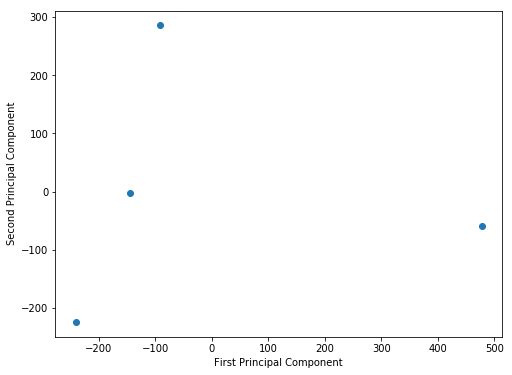

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_df[:,0], scaled_df[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [93]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans 

In [136]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
labels = kmeans.labels_

labels

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1,
       0, 0], dtype=int32)

In [137]:
new_series = pd.Series(labels) 
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,0


In [0]:
def get_centroids(df, column_header)
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

##Copied the code from Ryan Allred. It calculates the centroid of the points through their mean.

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 4:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

  ##Copied the code from Ryan Allred. It colour codes the clusters.

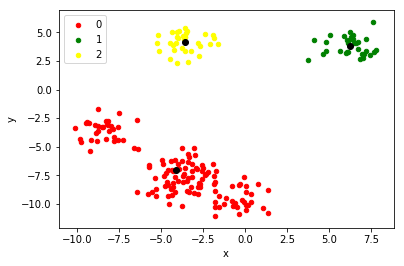

In [140]:
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)